# Day 17 Pre-Class: 2D NumPy Arrays

### <p style="text-align: right;"> &#9989; Krizma Nagi</p>

<img src="https://i.imgur.com/mhtHvEP.png">

### Goals for this pre-class assignment
By the end of this assignment, you should be able to:
* Review some of the basics of using NumPy arrays
* Understand the motivation behind 2D NumPy arrays
* Index, mask, and manipulate 2D NumPy arrays

### Assignment instructions

Watch the videos below, do the readings linked to below the videos, and complete the assigned programming problems.  Please get started early, and come to office hours if you have any questions! Make use of Slack as well!

**This assignment is due by 11:59 p.m. the day before class,** and should be uploaded into the appropriate "Pre-class assignments" submission folder.  Submission instructions can be found at the end of the notebook.

---
## Review of NumPy Arrays

It's been a little while since we introduced the concept of NumPy arrays. Below are a few videos that you have seen before in the pre-class assignment that introduced NumPy arrays. If you feel like you need a review of the material or are unclear about any of the foundational concepts of using arrays, you should take the time to rewatch these videos. **If you feel like you have a good understanding of the material, feel free to skip this portion of the assignment and go right ahead to working with 2D NumPy arrays.**

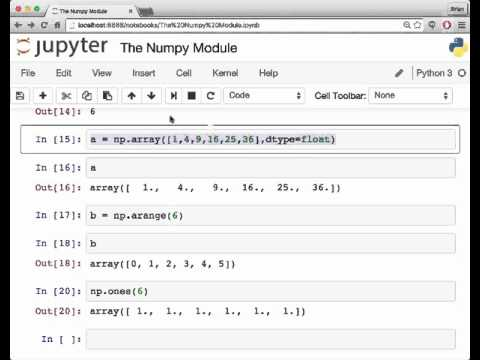

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("BTXyE3KLIOs",width=640,height=360)

(If the YouTube video doesn't work, try the [MediaSpace link](https://mediaspace.msu.edu/media/The+numpy+module/1_f2dka7x4))

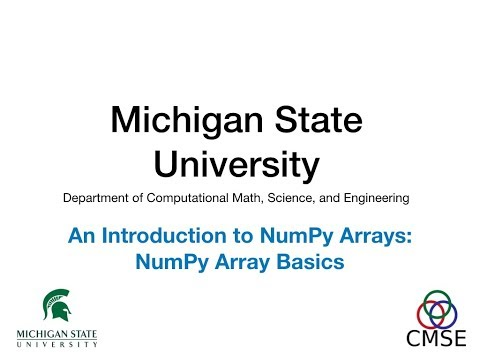

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("g7epZeDA_lQ",width=640,height=360)

(If the YouTube version doesn't work, try the [MediaSpace link](https://mediaspace.msu.edu/media/An+Introduction+to+NumPy+ArraysA+NumPy+Array+Basics/1_fz4bh3ng))

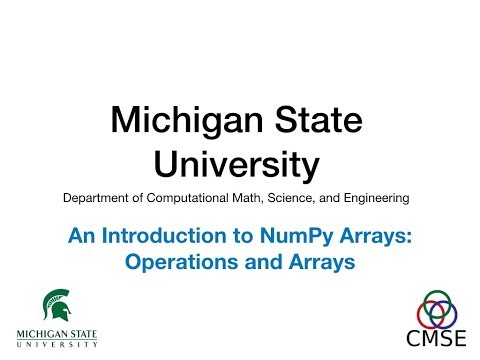

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("V2C9expTF1o",width=640,height=360)

(If the YouTube video doesn't work, try the [MediaSpace link](https://mediaspace.msu.edu/media/An+Introduction+to+NumPy+ArraysA+Operations+and+Arrays/1_qu3lpypx))

---
## Part 1: 2D NumPy arrays

In this assignment, we are going to spend some time thinking about higher dimensional arrays. In using the term "dimension" when talking about arrays, it can _almost_ help to think about these like geometrical shapes or objects. A line only has a length to it, so we call it a one dimensional object. A square, however, has a length _and_ a width, so we call it a two dimensional object. Though this metaphor can start to break down as the shapes become more complex, it works for our 1D and 2D cases. A 1D array is simply a single array of value, like `array([1,2,3,4,5])`. A 2D array, which we are going to introduce here today, is as bit more complex. 2D arrays are very commonly used in computational modeling and data analysis for reasons that will hopefully be clear after today.

&#9989;&nbsp;**To begin:** Watch this video on an introduction to 2D NumPy arrays. In this video, we will outline some real-world examples for why we might want to use these objects and go over some of the basics of creating them and using them. Answer the questions that follow after the video. (If the YouTube video doesn't work, this this [MediaSpace link](https://mediaspace.msu.edu/media/2D+NumPy+Array+Basics/1_dpq27j29))

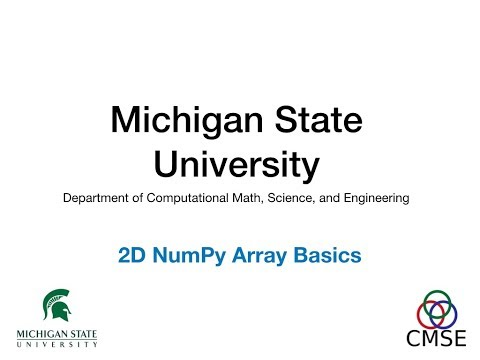

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo("KXPtg7iHbfw",width=640,height=360)

&#9989;&nbsp; **Do This:** _In your own words_, explain the idea of a 2D array to a friend who has never coded before. Why do we call it a **2D** array? Can you think of an example other than the examples outlined in the videos where 2D arrays could prove to be useful? 

<font size="+3">&#9998;</font> *Put your answer here*

### **1.1 Let's consider an example:** 

You may remember playing the game _Battleship_ as a kid, but if not, here is a brief overview of how the game works. Each player has a grid that they place ships onto. The other person playing makes guesses as to where their opponents ships are. If they guess correctly, the ship takes a "hit," which is denoted by a red peg. If they miss, then the ship remains untouched, noted by a white peg. This continues back and forth until one player sinks all of their opponent's ships.

We are going to use this game as a very basic example for making a 2D Numpy array. The grid for a game of _Battleship_ looks like the image to the right.

<table><tr><td><img src="https://proxy.duckduckgo.com/iu/?u=http%3A%2F%2Fstatic.guim.co.uk%2Fsys-images%2FGuardian%2FPix%2Fpictures%2F2012%2F4%2F4%2F1333548711318%2FBattleship-board-game-001.jpg&f=1" width=300px></td><td><img src="https://proxy.duckduckgo.com/iu/?u=https%3A%2F%2Fvignette.wikia.nocookie.net%2Fsurvivor-org%2Fimages%2F4%2F48%2FBattleship_board.jpg%2Frevision%2Flatest%3Fcb%3D20140620032009&f=1" width = 300px>
</td></tr></table>

First, let's make a 2D NumPy array to represent the _Battleship_ grid.  We will initialize all of the values to **0** using the `np.zeros` function in NumPy.

In [3]:
##Import numpy and alias it first
import numpy as np
##Make a board of zeros of shape 10 x 10
board = np.zeros((10, 10))
board

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

**Now that we have our board made**, we can use 2D indices to try and recreate the following _Battleship_ board. 

For squares where a ship is present, we will have the corresponding element of the array have a value of **1**. We don't want to define _each individual element_ of the array. That would take a long time. But, we can use 2D indexing to speed things up a bit and change ranges of elements at a time. For example, the ship on the right-hand side of the board which occupies three squares could be placed on our board using the following line of code: `board[3:6,8] = 1`, which __indexes__ the rows 3, 4, and 5 (not 6 because the endpoint is not included!) of the board and column 8 of the board, then sets the __values__ at those locations to be 1.

Let's start placing ships!

Once you have placed the ships, look at the entries of 2D array and then use the `matplotlib` function `imshow` to visualize the board and make sure that it matches our image. What do you notice about the values in the 2D array and how do they correspond to the image? 

<img src="https://proxy.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.datagenetics.com%2Fblog%2Fdecember32011%2Fs1.png&f=1" width = 300px>

[[0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


(-0.5, 9.5, 9.5, -0.5)

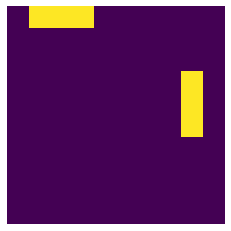

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Place first boat
board[3:6,8] = 1
# Place second boat
board[0, 1:4] = 1

# Print the 2D Array
print(board)

# Display the board
plt.imshow(board)
plt.axis('off') # Don't include the axes!

&#9989;&nbsp; **Do This:** Two of the five ships have been placed on the board for you. **Use 2D indexing to place the remaining ships on the board and verify that the placement matches the image using the `plt.imshow` command.**

(-0.5, 9.5, 9.5, -0.5)

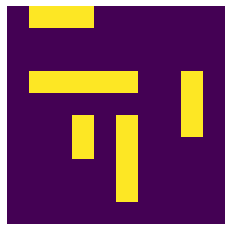

In [5]:
# Put your code here
board[3, 1:6] = 1

board[5:7, 3] = 1

board[5:9, 5] = 1

plt.imshow(board)
plt.axis('off')

---
### **1.2 Let's do another example:** 
Say we have the following dataset with some information about different cars.

|Engine Horsepower|Highway MPG|City MPG|Value ($)|
|:---------------:|:---------:|:------:|:-------:|
|335|26|19|46,135|
|300|28|19|40,650|
|162|23|15|20,000|
|184|36|23|24,490|
|100|34|28|17,050|
|400|15|10|170,829|

Let's make a 2D NumPy array to represent this dataset.

In [6]:
dataset = np.array([[335,26,19,46135],
                   [300, 28, 19, 40650],
                   [162, 23,15,20000],
                   [184,36,23,24490],
                   [100,34,28,17050],
                   [400,15,10,170829]])
dataset

array([[   335,     26,     19,  46135],
       [   300,     28,     19,  40650],
       [   162,     23,     15,  20000],
       [   184,     36,     23,  24490],
       [   100,     34,     28,  17050],
       [   400,     15,     10, 170829]])

&#9989;&nbsp; **Do This:** Explain how our dataset is now represented as a Numpy array. How is a row of information in the table represented in the 2D array? How is a column represented? Does this differ from a Pandas dataframe? This is an exercise in explaining where the data is stored and what it looks like in our code!

<font size="+3">&#9998;</font> The values are broken up by row and by colum, and it is represented the same as the rows and columns in the table. In pandas, there is a defined indexing system that is used to organize values. 

Let's try and answer a __basic question__ of this dataset. What is the average difference between highway MPG and city MPG for the cars in our dataset? 
- To do this, what __information__ do we need from the dataset? As we did in Pandas, in your mind 'highlight' the information we want to access. We need the highway MPG and the city MPG columns from the array.
- What __available tools__ do we have to do this? We can use slicing techniques as we did in the Battleship section. 

To start to complete this task, we can select our 2nd column and subtract the 3rd column from it.

In [7]:
dataset[:,1] - dataset[:,2]

array([ 7,  9,  8, 13,  6,  5])

&#9989;&nbsp; **Do This:** How does this code remind you of the way we retreived information from dataframes in Pandas? 

<font size="+3">&#9998;</font> It is similar to the usage of .loc and .iloc.

This gives us the differences between the MPG's, but if we want the average, then we need to take one additional step. We could write our own function to add up all of the values and then divide by how many values we have. (In fact, you should try and do this yourself to make sure that you can!) But, NumPy has a built-in method for taking the average of an array that we can use.

In [8]:
##Make a new array of the differences between the highway and city MPG's
diff_mpgs = dataset[:,1] - dataset[:,2]
##use the .mean() function to take the mean of an array quickly
print("The average difference between highway and city MPG's for our dataset is,", diff_mpgs.mean())

The average difference between highway and city MPG's for our dataset is, 8.0


This is just one possible question that we could answer of the dataset. You are going to work on trying to answer some of them on your own now.
For each of the tasks below, __explicitly note what information you need to complete the task and how you plan to access that information.__ 

&#9989;&nbsp; **Do This:** What are the values of each of the cars in our dataset in terms of **British Pounds (£)**? When this assignment was written, $£ 1 \approx \$ 1.37$. You should round your answers to _the nearest pound_. Can you do this using a pre-existing NumPy function?

<font size="+3">&#9998;</font> To answer this question, the cost of each car is needed and the conversion rate is needed. Access the last column and multiply each value in that column by 1.37 to get an array of answers.

In [9]:
## Put your code here
dataset[:,3]*1.37

array([ 63204.95,  55690.5 ,  27400.  ,  33551.3 ,  23358.5 , 234035.73])

&#9989;&nbsp; **Do This:** Write code to display only the data for cars that have an engine horsepower greater than or equal to 300 HP. There a couple of ways that you can do this. Are you going to use a loop to do this? Are you going to select the indexes by hand? Something else?

<font size="+3">&#9998;</font> You need the horsepower values for this question, and using a for and if statement would be easiest.

In [10]:
## Put your code here
for x in dataset:
    if x[0] >= 300:
        print(x)

[  335    26    19 46135]
[  300    28    19 40650]
[   400     15     10 170829]


In [12]:
dataset[dataset[:,0] >= 300]

array([[   335,     26,     19,  46135],
       [   300,     28,     19,  40650],
       [   400,     15,     10, 170829]])

---
## Part 2: Masking 2D arrays

The previous example introduced you to starting to work with data in python as a 2D array. As our datasets become larger and larger, sometimes we have to learn a few tricks to be able to select portions of our dataset and make manipulations more quickly. 

The following video outlines such a trick in 2D arrays called "masking." This is conceptually the same as using masks to interact with Pandas dataframes.

Watch the video and answer the questions that follow. (If the YouTube video doesn't work, try this [MediaSpace link](https://mediaspace.msu.edu/media/NumPy+Arrays+and+%22Masking%22/1_5bp5gzsh))

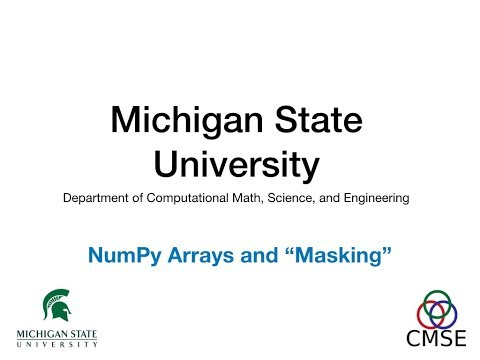

In [55]:
from IPython.display import YouTubeVideo
YouTubeVideo("bDTL4pds-18",width=640,height=360)

&#9989;&nbsp; **Do This:** Explain the concept of "masking" to someone who hasn't coded before. Why might we want to use masking? Is it always the right choice for selecting subsets of our data or parts of our arrays?

<font size="+3">&#9998;</font> Masking is a way to filter given data to only what is needed of that data. It is an easy way to be picky with a given dataset.

**Consider an example:** Before, we worked with a small dataset with some information about cars. For that example, it was really easy to see all of the data at once, make quick manipulations to it, and manually select rows based on a condition. _Now,_ we are going to work with the full dataset. Make sure that `cars.csv` is in the same directory as this notebook. As a note, the full dataset has more columns and **many** more rows than the small example that you used prior. Work through the following examples and check your answers as you go.

In [16]:
##First, load in the dataset
car_header = np.loadtxt("cars.csv", delimiter=",", dtype=str, max_rows=1)
car_data = np.loadtxt("cars.csv", delimiter=",", dtype=int, skiprows=1)

In [17]:
print("Headers:",car_header)

Headers: ['Year' 'Engine HP' 'Engine Cylinders' 'Number of Doors' 'highway MPG'
 'city mpg' 'Popularity' 'MSRP']


In [18]:
car_data

array([[ 2011,   335,     6, ...,    19,  3916, 46135],
       [ 2011,   300,     6, ...,    19,  3916, 40650],
       [ 2011,   300,     6, ...,    20,  3916, 36350],
       ...,
       [ 2012,   300,     6, ...,    16,   204, 50620],
       [ 2013,   300,     6, ...,    16,   204, 50920],
       [ 2006,   221,     6, ...,    17,    61, 28995]])

&#9989;&nbsp; **Question:** What is the `type` of all of the elements in our 2D array? Look at both the `np.loadtxt` command and the output of the array. Why did we have to import it like that? _Hint:_ This is a key component of working with NumPy arrays and something that we went over in one of the introductory videos from the previous pre-class assignment, so be sure to go back and look at that if you get stuck!

<font size="+3">&#9998;</font> The headers are strings, and the number values are integers. You can't mix strings and integers when loading in data.

&#9989;&nbsp; **Question:** How many different cars are in this dataset? What challenges does this pose when trying to select portions of the data for analysis? 

In [19]:
##Put your code here
(unique, counts) = np.unique(car_data, return_counts=True)
frequencies = np.asarray((unique,counts))
print(frequencies)

[[      0       2       3 ... 1500000 1705769 2065902]
 [     13    3156     425 ...       2       1       1]]


<font size="+3">&#9998;</font> There are 13 different cars in this data set.

We are working with a much larger dataset now. Let's try and answer a question together first. How many cars in our dataset have an engine horsepower of 300 HP or more? 

Let's use masking to try and answer the question we posed above. **Make sure you read the code comments in the following cells to understand what the code is doing.** This is all very similar to what was explained in the video on masking. 

In [65]:
##First, let's see what our masking condition returns. The horsepower is the column at index 1
##Remember, we only want to see whether the horsepower column of our dataset is greater than 300. If we
##don't specify that when we write our masking condition, then it will check every value in our array.
##Another way of saying this is that we will be masking every value in the array that's greater than 300,
##not JUST the horsepower like we want
car_data[:,1] >= 300

array([ True,  True,  True, ...,  True,  True, False])

In [2]:
##We have an array of true and false values, so we can do some masking now
car_data[ car_data[:, 1] >= 300]

NameError: name 'car_data' is not defined

In [67]:
##One last step, we just need to know how many rows are in our dataset now that it has been masked. We can use
##the .shape command or we can use the len() command. Either will work.
print("There are ", len(car_data),"cars in our dataset.")
print(len(car_data[ car_data[:, 1] >= 300]), "of them have 300 or more horsepower.")

There are  11814 cars in our dataset.
3126 of them have 300 or more horsepower.


That would have been a lot of cars to try and select by hand. We could have written a loop to do this, but if our dataset consisted of 100,000 cars, then a loop would take a really long time to try and find all of the ones we are looking for. Masking is an efficient way of selecting subsets of our data. Try answering the following question about the dataset on your own. The answer has been included so that you can check your work. 

&#9989;&nbsp; **Question:** What is the average cost of a car which gets at least 30 MPG highway? Round your answer to two decimal places.

_Check that your answer matches the correct answer:_ \$26,386.24

In [22]:
## Put your code here
car_data[:,4] >= 30
cost = car_data[ car_data[:, 4] >= 30]

The focus of the next in-class assignment is going to be on working with arrays and doing image analysis using arrays. Masking isn't a huge part of what is to come next, but it's a very useful tool and we wanted to give you some exposure to it now. Who knows, it may come in handy!

---
## Part 3: Loading Images

The last thing that you will do in this pre-class assignment is learn how we load images into python. In class, we are going to be doing some image processing, which is a rapidly evolving field where we use computation to manipulate, edit, and understand images. In order to work on these problems, though, we need to know how to get the data into our notebooks. The following code loads an image into python and displays it on the screen. **Read through the code and make sure you understand what it is doing.** Answer the questions that follow.

In [84]:
from PIL import Image
picture = Image.open("example.jpeg")

(-0.5, 499.5, 363.5, -0.5)

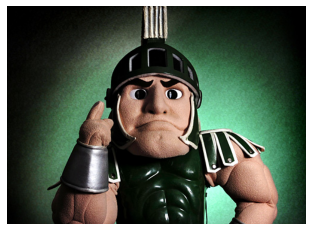

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(picture)
plt.axis('off')

In [86]:
## Get some basic information about our picture
img_array = np.asarray(picture)
picture_array = img_array.copy() ##We have to make a copy of the array so as to not overwrite the original image
picture_array.shape

(364, 500, 3)

&#9989;&nbsp; **Question:** What does the shape of our array mean? _Hint:_ Images are made up of RGB (red-green-blue pixels in an the shape of the picture).

<font size="+3">&#9998;</font> The number of each rgb pixels there are in the image that is loaded.

In [87]:
## Get some more information about our picture
print("Maximum value:",picture_array.max())
print("Minimum value:",picture_array.min())

Maximum value: 255
Minimum value: 0


Images are a 2D array of RGB vectors, which is to say that at each coordinate in our array, there is an array which tells us how much red, blue, and green makes up that pixel.  These values range from 0 to 255.

* **White pixels** are made using red=255, blue=255, green=255
* **Black pixels** are made using red=0, blue=0, green=0

When we load an image into python, it recognizes the structure of the file and loads it into our notebook as an RGB array. However, for the sake of our image analysis, we may want to work with each of the red, green, and blue matrices individually. The following code shows how we might do this.

In [88]:
##The following code separates out the red, blue, and green components for each of the pixels in our image
red_array, green_array, blue_array = picture_array[:,:,0], picture_array[:,:,1], picture_array[:,:,2]

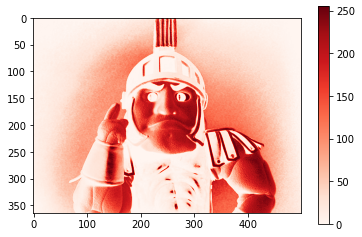

In [89]:
##Let's plot each channel and see what it looks like
plt.imshow(red_array, cmap = "Reds")
plt.colorbar()

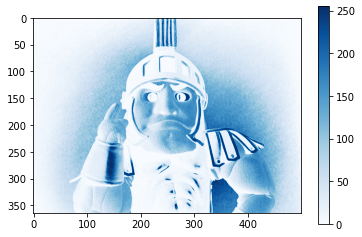

In [90]:
plt.imshow(blue_array, cmap = "Blues")
plt.colorbar()

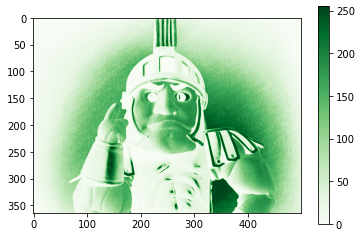

In [91]:
plt.imshow(green_array, cmap = "Greens")
plt.colorbar()

We can determine the average values of the individual color arrays to determine whether our image contains more red, green or blue:

In [92]:
print("Average red value:",red_array.mean())
print("Average blue value:",blue_array.mean())
print("Average green value:",green_array.mean())

Average red value: 62.41907692307692
Average blue value: 57.51311538461538
Average green value: 73.72024175824176


**Looks like the green pixels win.  Go Green!**

We are going to be working with code like this in class, so make sure you understand what the above lines all do and come to class with questions or submit them in your Google Form!

---
## Assignment Wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [6]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse201-pc-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Pre-class assignments" folder, find the appropriate submission link, and upload it there.

See you in class!

&#169; Copyright 2018,  Michigan State University Board of Trustees